# **Knowledge Graph Construction for NLP Applications**

In the implementation below we will learn the following:

1.   Extracting meaningful ***information*** from unstructured text data
2.   ***Constructing Knowledge Graphs*** from the extracted information

First, we will understand the Knowledge Graph construction process on unstructured text data, with a simple example

Consequently, we will employ the same process on ***unstructured wikipedia data***


# **Import Packages and Libraries**

In [ ]:
# Generic Libraries
import re
import pandas as pd # For creating dataframes of extracted information
import bs4
import requests
from tqdm import tqdm

# NLP Specific Libraries
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
from spacy.tokens import Span

# Libraries for displaying Knowledge Graph
import networkx as nx
import matplotlib.pyplot as plt


pd.set_option('display.max_colwidth', 200)
%matplotlib inline

# **Understanding the Dependency Parser**

In [ ]:
doc = nlp("Christiano Ronaldo plays for Juventus")

for tok in doc:
  print(tok.text, "->", tok.dep_)

Christiano -> compound
Ronaldo -> nsubj
plays -> ROOT
for -> prep
Juventus -> pobj


# **A Simple Example**

**Let us take a set of sentences on 'India'**

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize
import string
text = """Ever wondered about the differences between AI ML DL and DS? Well, we're about to explore all of those today. Stay tuned. So let's dive right into it. So, AI versus ML vs. DL versus DS, a whole bunch of jargon. But we're going to clarify all of that right up. So let's kick things off and take a look at AI. So, AI is really to do with the ability of computers and machines to perform tasks without explicitly programming them. Otherwise known as the ability for computers and machines to think by themselves. So we typically break out AI into two key categories. These are General AI and our AI. General AI typically refers to the ability for a computer or a machine to be able to handle a wide variety of tasks. US, as humans have the ability to do a whole heap of stuff. We can see, we can speak, we can hear, we can read, we can drive, we can do a whole range of things. The ability for AI and machines to be able to do a broad range of tasks similar to humans is what we typically refer to as general AI. Now, we're still a little bit of a while away from true general AI, but that's not to say it's not to come. Now narrow AI on the other hand, is the ability for a machine to handle a really simple or a really narrow range of tasks. So that could possibly be the ability to translate speech to text or to classify images as having different categories, or the ability to predict house prices, for example. All of these are examples of narrow AI. So I'm going to be painting a bunch of visual imagery to help you remember some of these topics. So the first one in terms of breaking out general and narrow AI, or the ability to remember general and narrow AI is just picture a really narrow or really skinny general in your mind. So that way you know that there are two different types of AI, general and narrow. Now on to the next topic, machine learning. So we've taken a look at AI as being broken up into general and narrow. But how does machine learning fit into this? Well, machine learning is the application of narrow AI to specific tasks. Now, when we typically talk about machine learning, we often compare it to traditional programming. So in traditional programming, we supply data plus rules or conditional logic and we get answers. Now, in machine learning on the other hand, we provide data plus historical answers to get rules. We can then pass new data to get new answers. So this is a bit of a change in the paradigm of how computer scientists and machine learning engineers are building programs these days. So what are some typical machine learning tasks? Well, we broadly break out machine learning into three key categories. These are supervised learning, unsupervised learning and semisupervised learning. So let's take a look at supervised learning first. So supervised learning can be broadly broken out into two key categories. These are classification and regression. Classification is all to do with grouping things into categories or labels. So say you had a big data set on all the different types of pizzas you've liked and whether or not you've liked them, yes or no, you could take that data and pass it through to a classification algorithm to help it learn which types of pizzas you like. So then when you pass through a new list of ingredients, it would be able to predict yes, you would like that pizza, or no, you might not. Regression on the other hand, is all to do with predicting continuous variables. Some great examples of regression are sales forecasting and predicting prices of houses. So that encapsulates supervised learning. Now, what about unsupervised learning? Well, there's two key things to think about when you think of unsupervised learning. These are really clustering, so the ability to group people together. So say you wanted to group together high performing and low performing and medium performing employees, or high value, low value, medium value customers, or a whole bunch of other different types of data. But really it's all to do with grouping things together. Now, dimensionality reduction on the other hand, is all to do with condensing the features that you've got within a machine learning model. So a lot of the time you might start out with a huge data set with a lot of columns and you're not really sure which of those columns are important for your machine learning model. Dimensionality reduction helps you reduce the number of columns that you've got so that you can really focus on the important ones. Now, in order to remember supervised learning and unsupervised learning, I suggest you remember this initialism Christopher Robin caught a Duck. So that way you remember classification, regression, clustering and dimensionality reduction. So that takes care of supervised and unsupervised learning. But what about semisupervised learning? Well, this is where reinforcement learning comes in. Now, reinforcement learning has four key things. These are an agent, an action, an environment and a reward. It's similar to how you might choose to condition a dog. A dog might do something right and you might reward it with a piece of food. In a similar way, we train reinforcement learning models to act in a correct way in a given environment in order to learn appropriate actions given that specific environment. Now, the best way to remember reinforcement learning techniques is to remember area 51. So that way you remember agent, reward, environment and actions. OK, so that takes care of machine learning. Now we're going to delve a little bit deeper and get into deep learning. So deep learning is a subset of machine learning and really it's to do with performing machine learning tasks using deep neural networks. Now, deep neural networks are networks that have multiple hidden layers. So if you've ever seen a diagram that looks sort of like this? This is a representation of a neural network. But specifically, in this case, this is a deep neural network because it has multiple hidden layers. Now, the best way to remember deep learning is to remember that deep learning is just like an onion. It has multiple layers, a little bit like Shrek. Now, that sort of covers AI, ML and DL. What about data science? Well, data science is the practice that sits over AI, ML, and DL. It basically is the art of extracting knowledge, insight, and meaning from data. The best way to remember the key components of data science is to look at the Crisp DM framework. So the Crispdm Framework stands for the Cross Industry Standard Process for Data Mining. And basically, it's a framework to help you along your way to producing really good data science projects. Now, there's six key steps in the data science process. These are business understanding, so understanding the business that you're working with and the environment in which they operate. Two, data understanding. So understanding the data that you've got on hand. So whether or not you've got Missing values, visualizing that data and taking a look at some summary statistics. We've then got data preparation. So this is all to do with getting our data ready for modeling. In this step, we might perform some feature engineering and create some new columns. We might fill into Missing Values and a whole bunch of other data preparation steps, like, for example, splitting our data into training and testing. Next, we've got my favorite, which is modeling. This is all to do with training your machine learning algorithms to perform well on a specific task. Once we've trained our models in that modeling step, we get onto evaluation. Given that we've trained our model, we want to make sure that it's going to work well once we deploy it into the real world. This is what the evaluation step is all about. In this step, we try to check whether or not our model is likely to perform well using specific evaluation metrics. Now, once we've gone through all of that, the last step is to go and deploy our model. In order to deploy our model, we could release it as a Rest API, containerise it up, or save it as a binary so we can go and use it elsewhere. Now, a great way to remember Chris DM is to remember Barry. Drove directly to the medical emergency department. That way, you remember business understanding, data understanding, data preparation, modeling, evaluation, and deployment. Now, I've talked a lot about theory, but where do the Python packages that you typically see used fit into this framework? Well, in terms of data science, NumPy, Pandas, and Matplotlib are probably going to be the most important packages that you see floating around. NumPy and Pandas help you traverse and explore your data and really work with your data. In terms of performing manipulations and data preparation. Mat, Plot, lib, and Seabourn help you visualize that data and explore it even further. Now, the most important library in terms of machine learning is probably Psychiatlearn. So ScikitLearn has been around for quite some time and gives you a whole bunch of really powerful algorithms and utilities to help use them to train your machine learning models. Now, deep learning is becoming increasingly popular, and there's a large number of libraries that can help you perform deep learning. Some of which are notable are TensorFlow, Keras, PyTorch, and Piano just in. Name a few. And that about wraps up AI versus Mo vs. Do vs. DS. Thanks so much for tuning in, guys. Hopefully you found this video useful. If you did, be sure to give it a thumbs up and hit subscribe. Until next time, peace."""
sentences = text.lower()
sentences = "".join([char for char in sentences if char not in string.punctuation])
sentences = sent_tokenize(text)
sentences

['Ever wondered about the differences between AI ML DL and DS?',
 "Well, we're about to explore all of those today.",
 'Stay tuned.',
 "So let's dive right into it.",
 'So, AI versus ML vs. DL versus DS, a whole bunch of jargon.',
 "But we're going to clarify all of that right up.",
 "So let's kick things off and take a look at AI.",
 'So, AI is really to do with the ability of computers and machines to perform tasks without explicitly programming them.',
 'Otherwise known as the ability for computers and machines to think by themselves.',
 'So we typically break out AI into two key categories.',
 'These are General AI and our AI.',
 'General AI typically refers to the ability for a computer or a machine to be able to handle a wide variety of tasks.',
 'US, as humans have the ability to do a whole heap of stuff.',
 'We can see, we can speak, we can hear, we can read, we can drive, we can do a whole range of things.',
 'The ability for AI and machines to be able to do a broad range of t

In [ ]:
sentences[1]

"Well, we're about to explore all of those today."

**Convert Sentences to a pandas dataframe**

In [ ]:
df = pd.DataFrame(sentences, columns =['Sentence'])

In [ ]:
df.head(6)

,Sentence
0,Ever wondered about the differences between AI ML DL and DS?
1,"Well, we're about to explore all of those today."
2,Stay tuned.
3,So let's dive right into it.
4,"So, AI versus ML vs. DL versus DS, a whole bunch of jargon."
5,But we're going to clarify all of that right up.


# **Information Extraction**
**Extract Entities and Relations**

## **Function to extract *entities* from text**

In [ ]:
def get_entities(sent):
  head_entity = ""
  candidate_entity = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""

  for tok in nlp(sent):
    # If token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":

      # CHECK: token is a 'compound' or 'modifier' or 'attribute'
      if tok.dep_ == "compound" or tok.dep_.endswith("mod") or tok.dep_ == "attr":
        prefix = tok.text

        # If the previous word was also a 'compound' or 'modifier' or 'attribute', then add the current word to it
        if prv_tok_dep == "compound" or prv_tok_dep.endswith("mod") or prv_tok_dep == "attr":
          prefix = prv_tok_text + " " + tok.text

      # Assign head entity or, subject
      if tok.dep_.find("subj") == True:
        head_entity = prefix + " " + tok.text
        prefix = ""
        prv_tok_dep = ""
        prv_tok_text = ""

      # Assign candidate entity or, object
      if tok.dep_.find("obj") == True:
        candidate_entity = prefix + " " + tok.text
      else:
        candidate_entity = prefix # In some cases the candidate entity is an 'attribute'

      # Update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text

  return [head_entity.strip(), candidate_entity.strip()]

In [ ]:
get_entities("Christiano Ronaldo scored 3 goals")

['Christiano Ronaldo', '3 goals']

## **Extract Head Entity and Candidate Entity (Subject and Object) from text**

In [ ]:
entity_pairs = []

for i in tqdm(df["Sentence"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 114/114 [00:01<00:00, 75.70it/s]


In [ ]:
entity_pairs[0:6]

[['', 'AI ML'],
 ['we', 'today'],
 ['', ''],
 ["So 's", 'right it'],
 ['', 'whole jargon'],
 ['we', 'right up']]

## **Function to extract *relations* from text**

In [ ]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object
  matcher = Matcher(nlp.vocab)

  #define the pattern
  pattern = [{'DEP':'ROOT'},
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},
            {'POS':'ADJ','OP':"?"}]

  matcher.add("matching_1", [pattern])

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]]

  return(span.text)

## **Extract Relations (Predicates) from text**

In [ ]:
relations = [get_relation(i) for i in tqdm(df['Sentence'])]

100%|██████████| 114/114 [00:01<00:00, 102.30it/s]


In [ ]:
relations[0:5]

['wondered about', "'re about", 'Stay', 'let', 'So']

## **Identify *subject/source* from entities**

In [ ]:
source = [i[0] for i in entity_pairs]

## **Identify *object/target* from entities**

In [ ]:
target = [i[1] for i in entity_pairs]

## **Create dataframe in <*subject, object, predicate*> format**
## **This is <*source, target, edge*> in knowledge graph**

In [ ]:
kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})
kg_df.head()

,source,target,edge
0,,AI ML,wondered about
1,we,today,'re about
2,,,Stay
3,So 's,right it,let
4,,whole jargon,So


In [ ]:
kg_df.to_csv('KnowledgeGraph.csv')

# **Construct knowledge graph**

In [ ]:
KG = nx.from_pandas_edgelist(kg_df, "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

# **Plot knowledge graph**

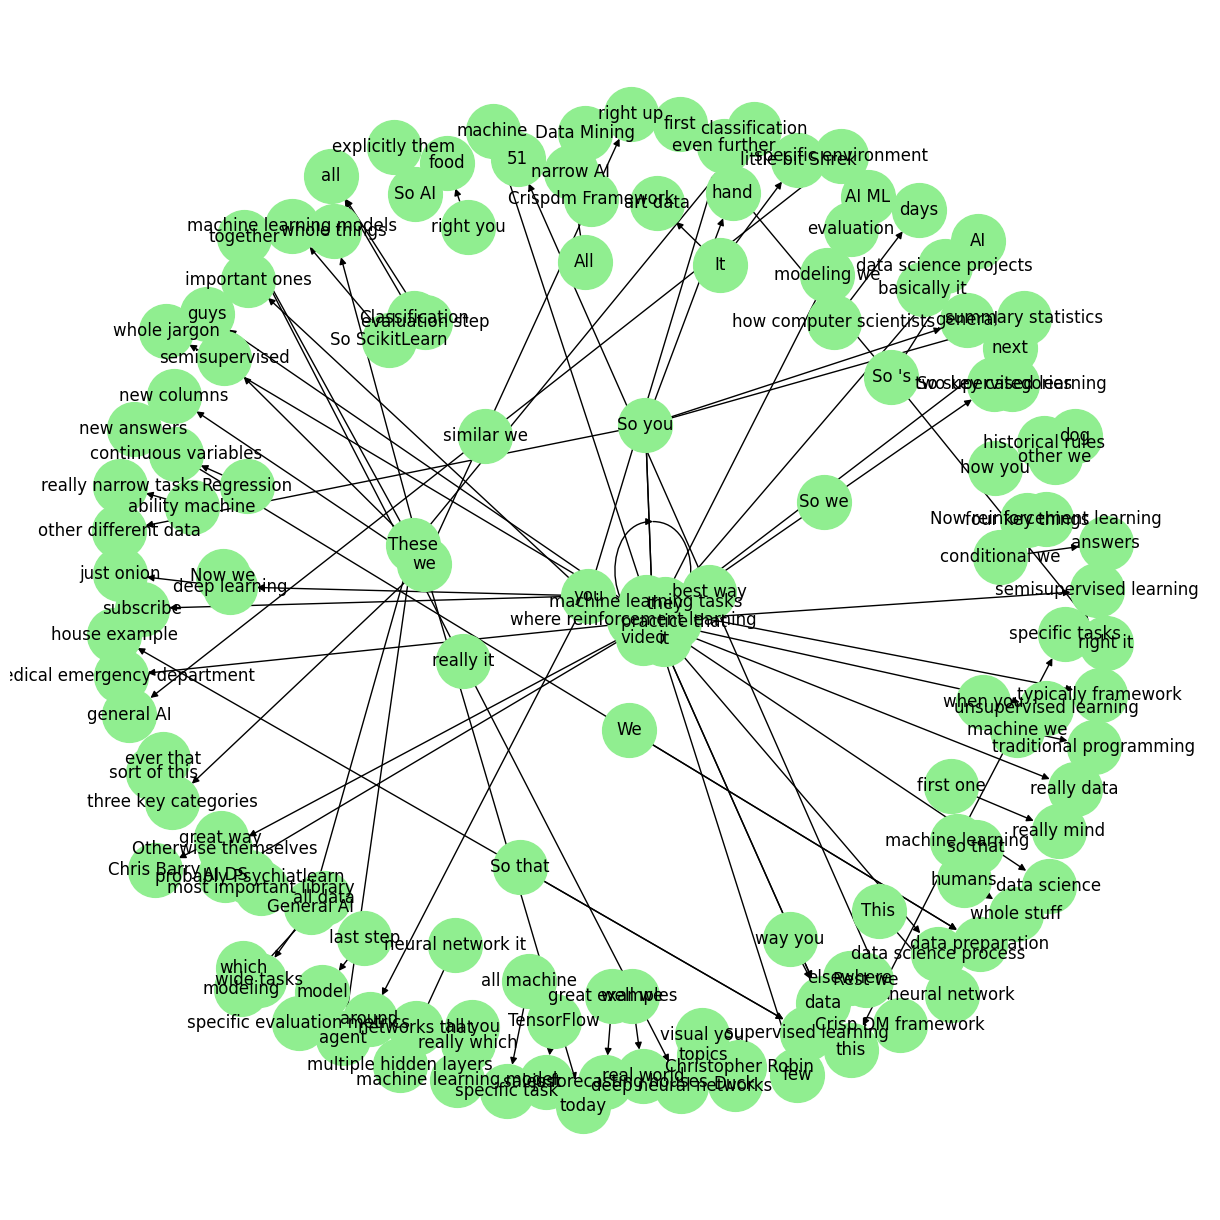

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(KG)
nx.draw(KG, with_labels=True, node_color='lightgreen', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

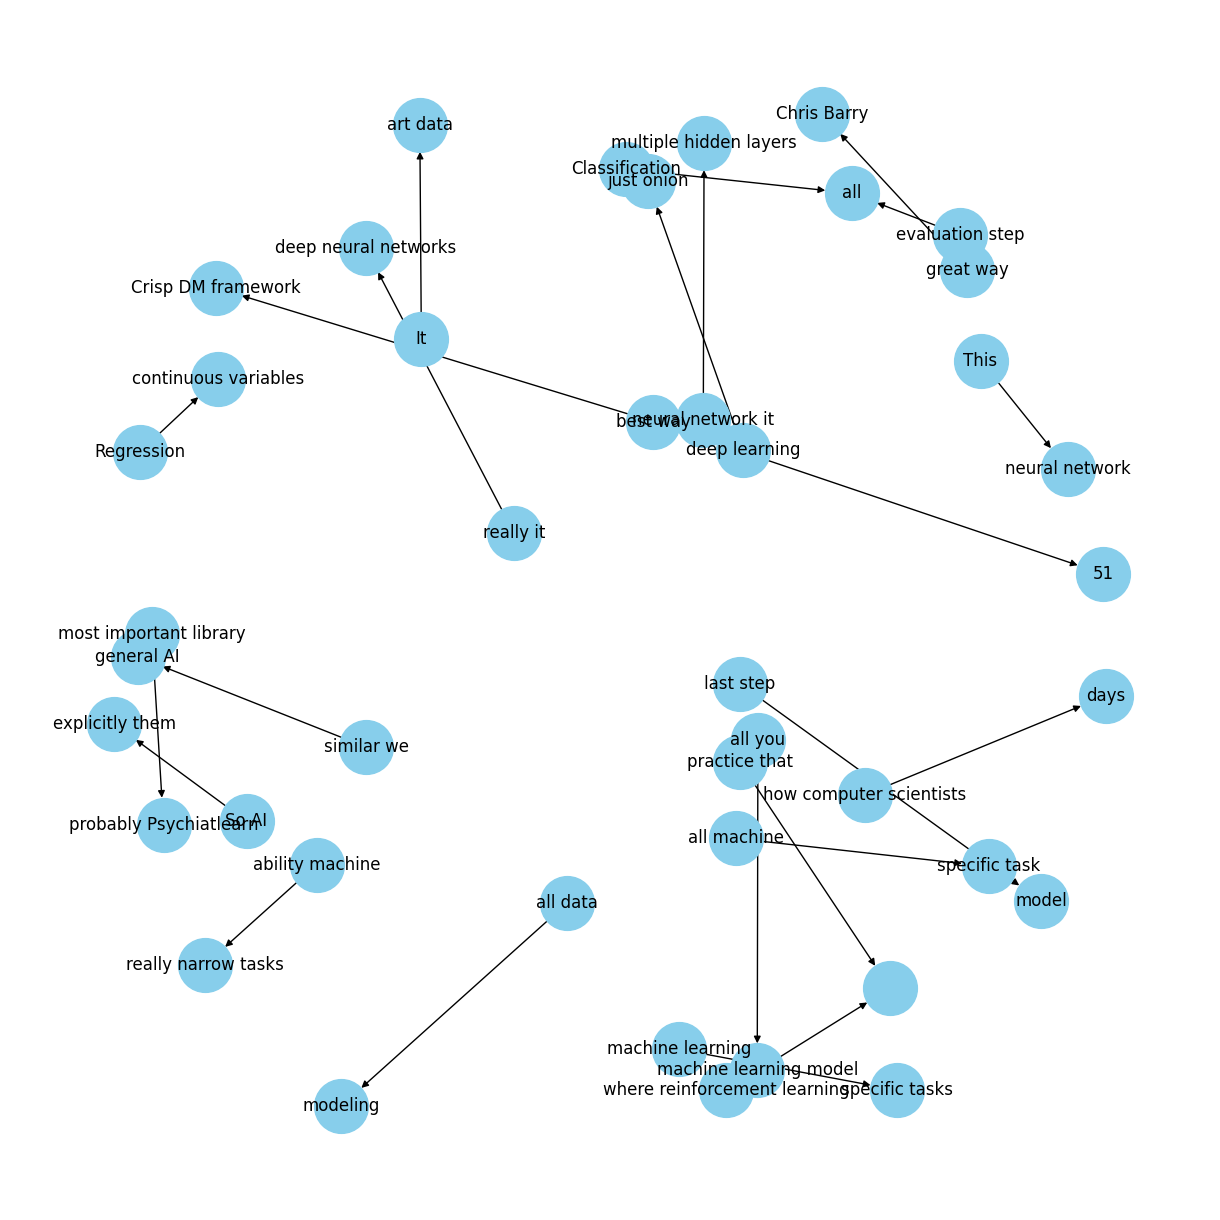

In [ ]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="is"], "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()